# Imports

In [1]:
import pandas as pd
import numpy as np

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as plt

# Functions

## Plots

### Figure size

In [3]:
plt.rcParams['figure.figsize']=(15, 15)

### Chart bars

In [4]:
def graph_bar(kind, dataframe, column, title, legend, color):
    
    if kind == 'vertical':
        
        dataframe[column].plot.barh(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, figsize = (15,10))
        plt.show();
    
    elif kind == 'horizontal':
        dataframe[column].plot.bar(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, figsize = (15,10))
        plt.show();
        
    elif kind == 'stacked':
         dataframe[column].plot.bar(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, stacked = True, 
                                    figsize = (15,10))

In [5]:
def graph_bar(kind, dataframe, column, title, color):
    
    if kind == 'vertical':
        
        dataframe[column].plot.barh(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, figsize = (15,10))
        plt.show();
    
    elif kind == 'horizontal':
        dataframe[column].plot.bar(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, figsize = (15,10))
        plt.show();

In [6]:
def severe_cases(dataframe):
    
     dataframe[['Number of hospitalisation (%)', 'Number of Intensive Care Unit (%)',
                    'Number of deaths (%)']].plot.bar(title = 'Severe Cases', grid = 1, 
                    yticks = [i for i in range(0,100,10)], 
                    rot=0, fontsize = 13, color = ['Darkblue', 'Orange', 'Darkred'], stacked = True, figsize = (15,10))

### Evolution

In [7]:
def overview(dataframe, title):
    
    if title == 'evolution':
        plt.rcParams['figure.figsize']=(15, 15)
        fig, axs = plt.subplots(4)
        fig.suptitle('Pandemic evolution')
        axs[0].plot(dataframe.date, dataframe.num_infections)
        axs[0].set_title('Number of infections')
        axs[1].plot(dataframe.date, dataframe.num_hosp)
        axs[1].set_title('Number of hospitalisations')
        axs[2].plot(dataframe.date, dataframe.num_uci)
        axs[2].set_title('Number of Intensive Care Unit')
        axs[3].plot(dataframe.date, dataframe.num_dead)
        axs[3].set_title('Number of deaths')
    
    if title == 'Number of infections':
        fig, axs = plt.subplots(3)
        fig.suptitle(title)
        axs[0].plot(dataframe.date, dataframe.num_infections, color = 'Darkgreen')
        axs[0].set_title('Daily')
        axs[1].plot(dataframe.date, dataframe.ave_7_num_infections, color = 'Darkgreen', linewidth=3)
        axs[1].set_title('Moving 7 day average')
        axs[2].plot(dataframe.date, dataframe.cumu_num_infections, color = 'Darkgreen', linewidth=3)
        axs[2].set_title('Cumulative')
        plt.rcParams['figure.figsize']=(15, 15);
        
    elif title == 'Number of hospitalisations':
        fig, axs = plt.subplots(3)
        fig.suptitle(title)
        axs[0].plot(dataframe.date, dataframe.num_hosp, color = 'Orange')
        axs[0].set_title('Daily')
        axs[1].plot(dataframe.date, dataframe.ave_7_num_hosp, color = 'Orange', linewidth=3)
        axs[1].set_title('Moving 7 day average')
        axs[2].plot(dataframe.date, dataframe.cumu_num_hosp, color = 'Orange', linewidth=3)
        axs[2].set_title('Cumulative')
        plt.rcParams['figure.figsize']=(15, 15);
    
    elif title == 'Number of Intensive Care Units':
        fig, axs = plt.subplots(3)
        fig.suptitle(title)
        axs[0].plot(dataframe.date, dataframe.num_uci, color = 'Darkblue')
        axs[0].set_title('Daily')
        axs[1].plot(dataframe.date, dataframe.ave_7_num_uci, color = 'Darkblue', linewidth=3)
        axs[1].set_title('Moving 7 day average')
        axs[2].plot(dataframe.date, dataframe.cumu_num_uci, color = 'Darkblue', linewidth=3)
        axs[2].set_title('Cumulative')
        plt.rcParams['figure.figsize']=(15, 15);
        
    elif title == 'Number of deaths':
        fig, axs = plt.subplots(3)
        fig.suptitle(title)
        axs[0].plot(dataframe.date, dataframe.num_dead, color = 'Darkred')
        axs[0].set_title('Daily')
        axs[1].plot(dataframe.date, dataframe.ave_7_num_dead, color = 'Darkred', linewidth=3)
        axs[1].set_title('Moving 7 day average')
        axs[2].plot(dataframe.date, dataframe.cumu_num_dead, color = 'Darkred', linewidth=3)
        axs[2].set_title('Cumulative')
        plt.rcParams['figure.figsize']=(15, 15);

### Moving averages

In [8]:
def inspect_mov_ave(dataframe):
    
      
    dataframe = dataframe.copy()
    
    dataframe = dataframe[['date', 'num_infections']]
    
    for i in range(1, 15, 2):
        dataframe[f'move_ave_{i}'] = dataframe.iloc[:,1].rolling(window=i).mean()
    
    fig, axs = plt.subplots(len(dataframe.columns))
    for i in range(1, len(dataframe.columns)):
        axs[i].plot(dataframe.date, dataframe[str(dataframe.columns[i])], color = 'Darkgreen')
        axs[i].set_title(str(dataframe.columns[i]))
        plt.rcParams['figure.figsize']=(20, 20)

### Compare moving average

In [9]:
def compare_7mov_ave():
    
    global bydate
    
    
    plt.plot(bydate[['date','ave_7_num_infections']].set_index('date'), 'r', label = '7 days moving average', linewidth=4)
    plt.plot(bydate[['date','num_infections']].set_index('date'), label = 'Number of infections', color = 'Darkgreen')
    plt.legend(fontsize = 'xx-large')
    plt.show();

## Dataframe

### Sorting data

In [10]:
def sort_data(dataframe, column):
    
    return pd.DataFrame(dataframe[column].sort_values())

### Data cleaning

In [11]:
def clean_data():
    
    global db1
    
    # Number of Infections greater than 1:
    db1 = db1[(db1.num_infections > 0)].reset_index()
    db1 = db1.drop(columns = ['index'], axis = 1)
    
    # Sort ascending order by date:
    db1['date'] = pd.to_datetime(db1.date)
    db1 = db1.sort_values(by="date").reset_index()
    db1 = db1.drop(columns = ['index'], axis = 1)
   
    # Data cleaning autonomous_region:
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Comunidad Valenciana' if x == 'Valenciana, Comunidad' else x)
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Comunidad de Madrid' if x == 'Madrid, Comunidad de' else x)
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Región de de Murcia' if x == 'Murcia, Región de' else x)
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Comunidad Foral de Navarra' if x == 'Navarra, Comunidad Foral de' else x)
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Principado de Asturias' if x == 'Asturias, Principado de' else x)
    
    # Data cleaning province:
    db1['province'] = db1.province.apply(lambda x: 'Alicante' if x == 'Alicante/Alacant' else x)
    db1['province'] = db1.province.apply(lambda x: 'Castellón' if x == 'Castellón/Castelló' else x)
    db1['province'] = db1.province.apply(lambda x: 'Araba' if x == 'Araba/Álava' else x)
    db1['province'] = db1.province.apply(lambda x: 'Valencia' if x == 'Valencia/València' else x)
    
    # Data cleaning sex and age_interval:
    db1 = db1[(db1.sex != 'NC') & (db1.age_interval != 'NC')]

### Cumulative

In [12]:
def cumulative(dataframe):
    
    cumu_num_infections = dataframe.num_infections.cumsum()
    cumu_num_hosp = dataframe.num_hosp.cumsum()
    cumu_num_uci = dataframe.num_uci.cumsum()
    cumu_num_dead = dataframe.num_dead.cumsum()

    cumulative = pd.DataFrame({'cumu_num_infections': cumu_num_infections, 'cumu_num_hosp': cumu_num_hosp, 
                               'cumu_num_uci': cumu_num_uci, 'cumu_num_dead': cumu_num_dead})
    dataframe = pd.concat([dataframe, cumulative], axis = 1)
    return dataframe

### Relative frequencies

In [13]:
def freq_rel(dataframe):
    
    dataframe['Number of infection (%)'] = [round(i/ dataframe['num_infections'].sum(),3)*100 for i in dataframe['num_infections']]
    dataframe['Number of hospitalisation (%)'] = [round(i/ dataframe['num_hosp'].sum(),3)*100 for i in dataframe['num_hosp']]
    dataframe['Number of Intensive Care Unit (%)'] = [round(i/ dataframe['num_uci'].sum(),3)*100 for i in dataframe['num_uci']]
    dataframe['Number of deaths (%)'] = [round(i/ dataframe['num_dead'].sum(),3)*100 for i in dataframe['num_dead']]
    
    return dataframe

In [14]:
def organise(column):
    
    global db1

    name = db1.groupby(column).sum()
    freq_rel(name)
    
    return name

### Moving averages: 7 days moving average

In [15]:
def mov_7_ave(dataframe):
    dataframe['ave_7_num_infections'] = dataframe.loc[:,'num_infections'].rolling(window=7).mean()
    dataframe['ave_7_num_hosp'] = dataframe.loc[:,'num_hosp'].rolling(window=7).mean()
    dataframe['ave_7_num_uci'] = dataframe.loc[:,'num_uci'].rolling(window=7).mean()
    dataframe['ave_7_num_dead'] = dataframe.loc[:,'num_dead'].rolling(window=7).mean()
    
    return dataframe

### Evolution

In [16]:
def evolution(dataframe):
    
    
    bydate = dataframe.groupby('date').sum().reset_index()
    bydate = cumulative(bydate)
    bydate = mov_7_ave(bydate)
    
    return bydate

# Data

In [17]:
db1 = pd.read_csv('covid-19-sample_new.csv')

## Description

+ **age_interval**: Intervalo de años en el cual se ubica el grupo de análisis
+ **autonomous_region**: Comunidad autónoma donde se registran los datos.
+ **date**: Fecha del momento en el cual se obtuvieron los datos.
+ **num_dead**: Número de muertes que se han producido en el grupo de análisis.
+ **num_hosp**: Número de hospitalizaciones que ha tenido el grupo de análisis.
+ **num_infections**: Número de infecciones que han se han reportado en el grupo de análisis.
+ **num_uci**: Número de ingresos en la Unidad de Cuidados Intensivos que ha tenido el grupo de análisis.
+ **province**: Provincia donde se registran los datos.
+ **sex**: Sexo del grupo de análisis (H, M, NC).

## Data cleaning

In [18]:
clean_data()

# Region 

In [19]:
region = organise('autonomous_region')

## Number of infections per region

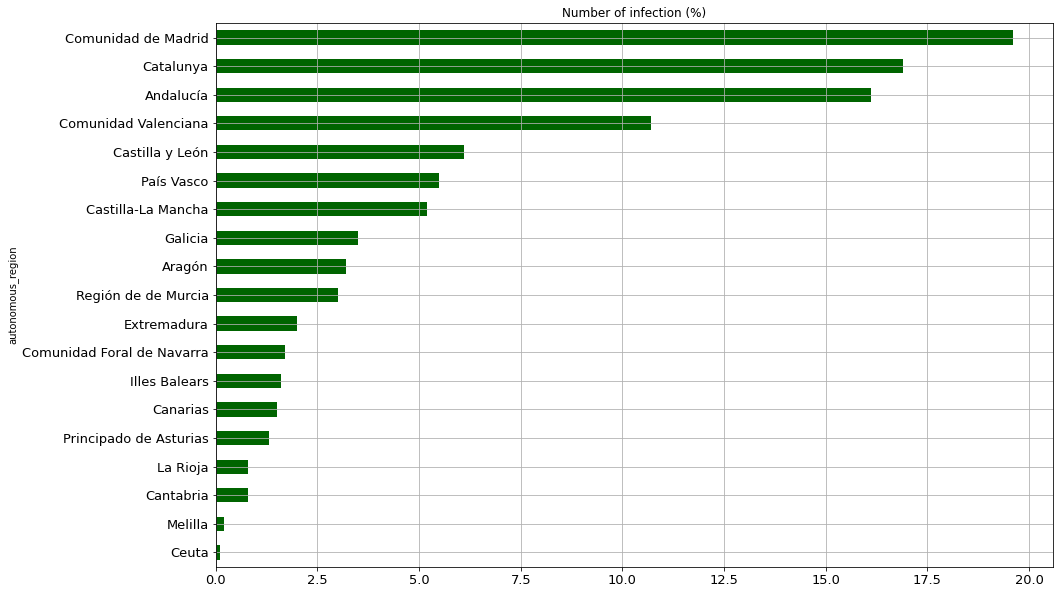

In [20]:
graph_bar('vertical', sort_data(region, 'Number of infection (%)'), 
          'Number of infection (%)', 'Number of infection (%)', 'Darkgreen')

## Number of hospitalisations per region

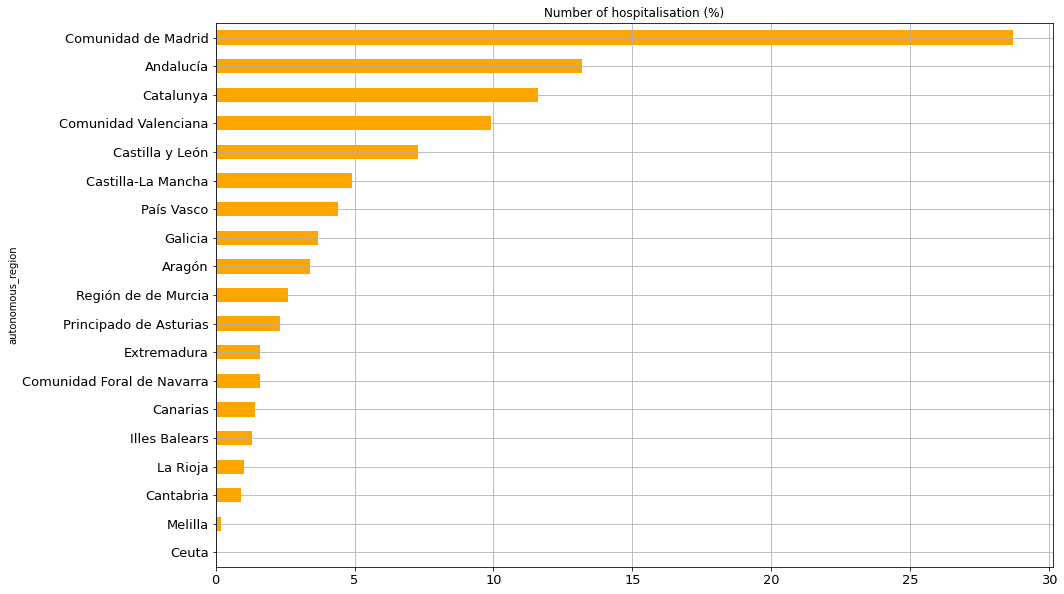

In [21]:
graph_bar('vertical', sort_data(region, 'Number of hospitalisation (%)'), 
          'Number of hospitalisation (%)', 'Number of hospitalisation (%)', 'Orange')

## Number of Intensive Care Unit per region

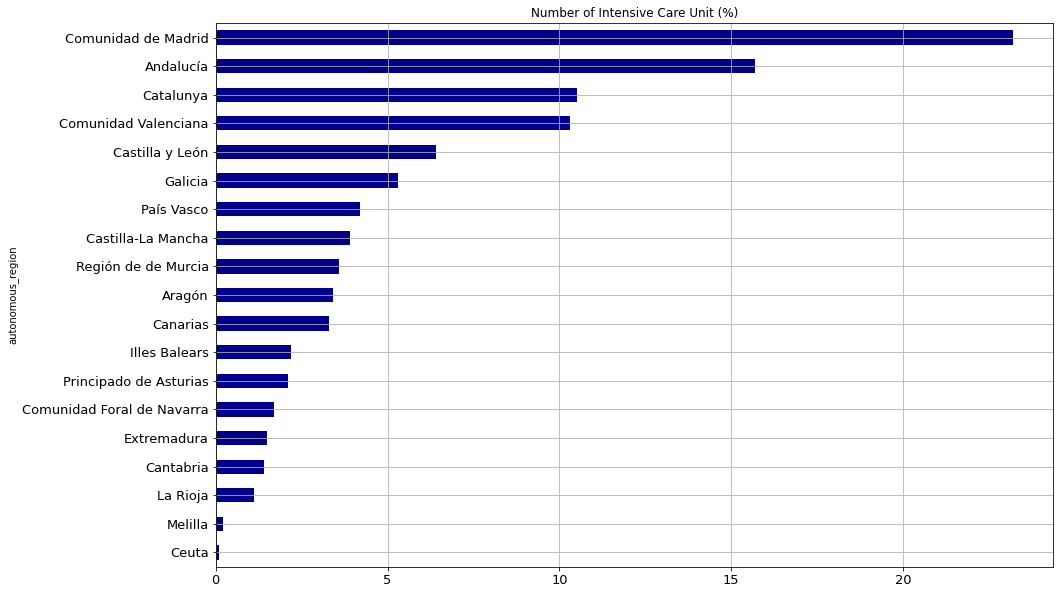

In [22]:
graph_bar('vertical', sort_data(region, 'Number of Intensive Care Unit (%)'), 
          'Number of Intensive Care Unit (%)', 'Number of Intensive Care Unit (%)', 'Darkblue')

## Number of deaths per region

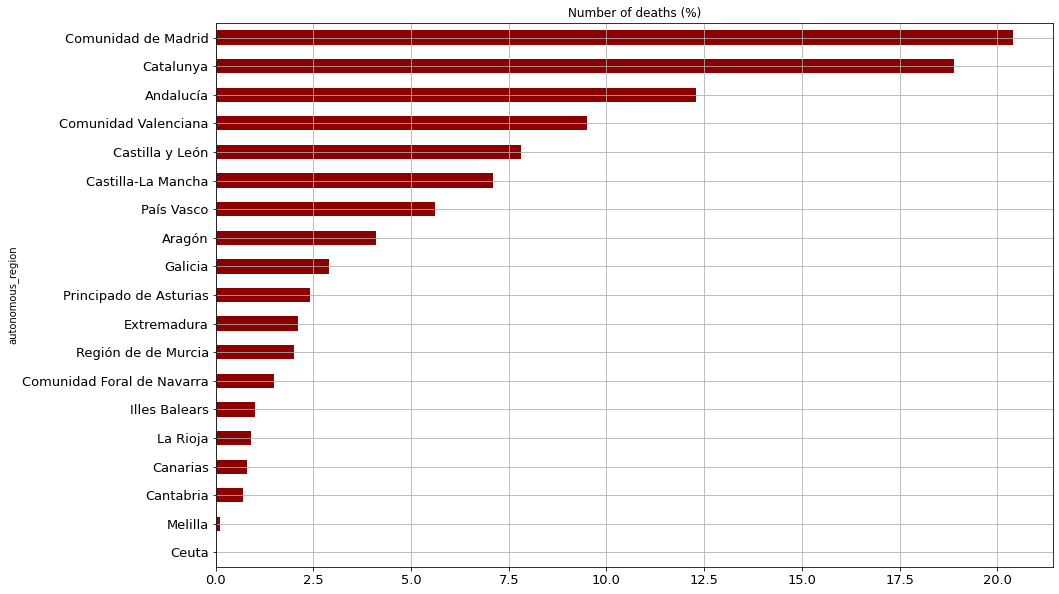

In [23]:
graph_bar('vertical', sort_data(region, 'Number of deaths (%)'), 
          'Number of deaths (%)', 'Number of deaths (%)', 'Darkred')

# Province

In [24]:
province = organise('province')

## Number of infections per province

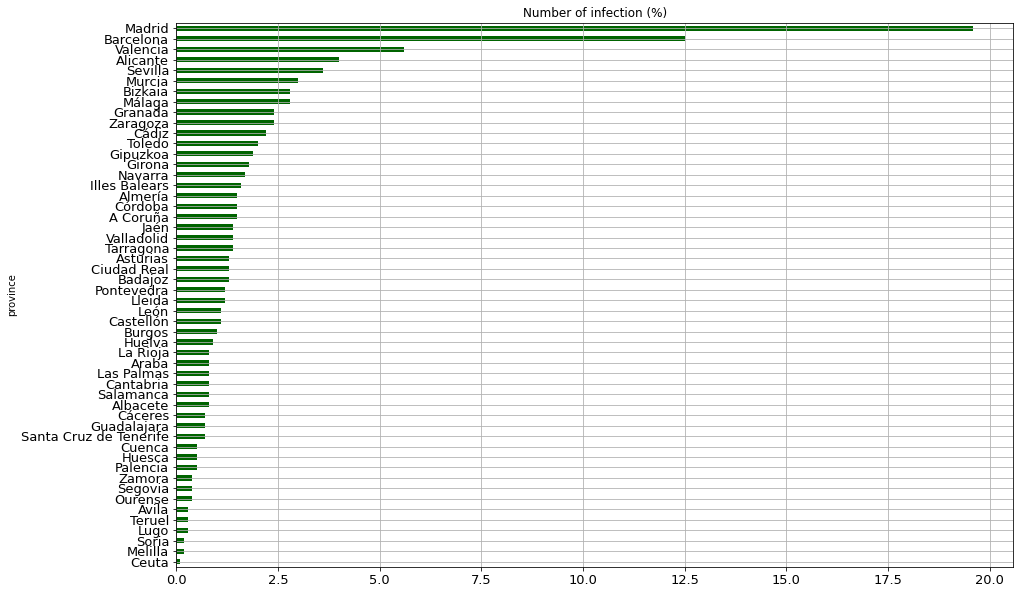

In [25]:
graph_bar('vertical', sort_data(province, 'Number of infection (%)'), 
          'Number of infection (%)', 'Number of infection (%)', 'Darkgreen')

## Number of hospitalisations per province

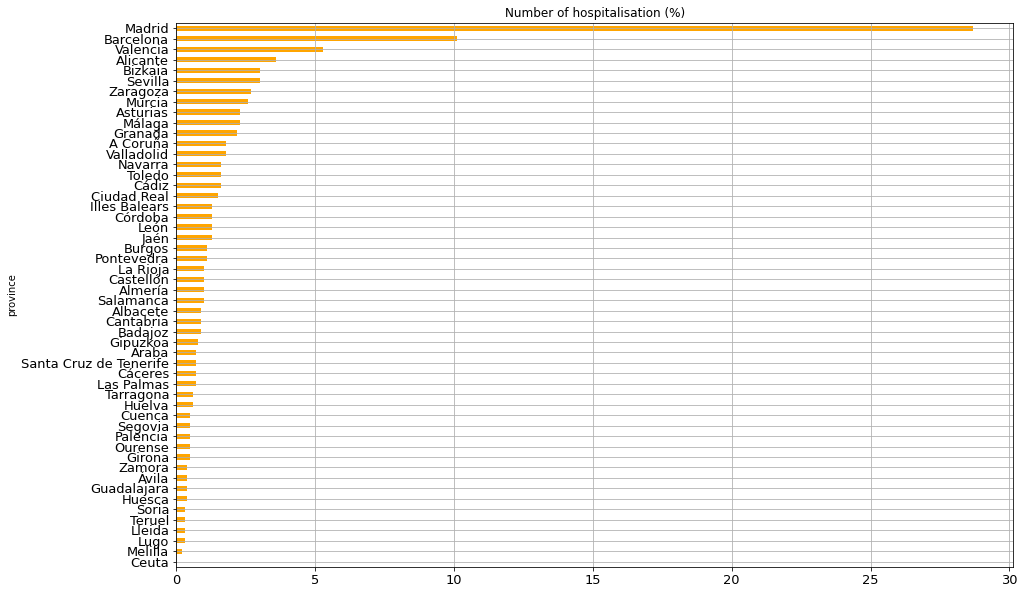

In [26]:
graph_bar('vertical', sort_data(province, 'Number of hospitalisation (%)'), 
          'Number of hospitalisation (%)', 'Number of hospitalisation (%)', 'Orange')

## Number of Intensive Care Unit per province

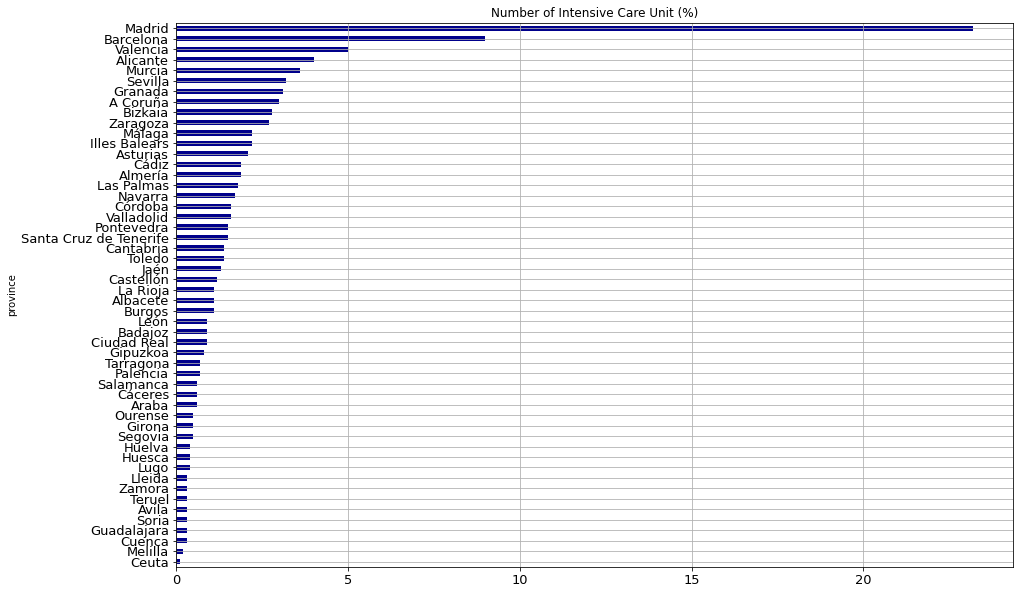

In [27]:
graph_bar('vertical', sort_data(province, 'Number of Intensive Care Unit (%)'), 
          'Number of Intensive Care Unit (%)', 'Number of Intensive Care Unit (%)', 'Darkblue')

## Number of deaths per province

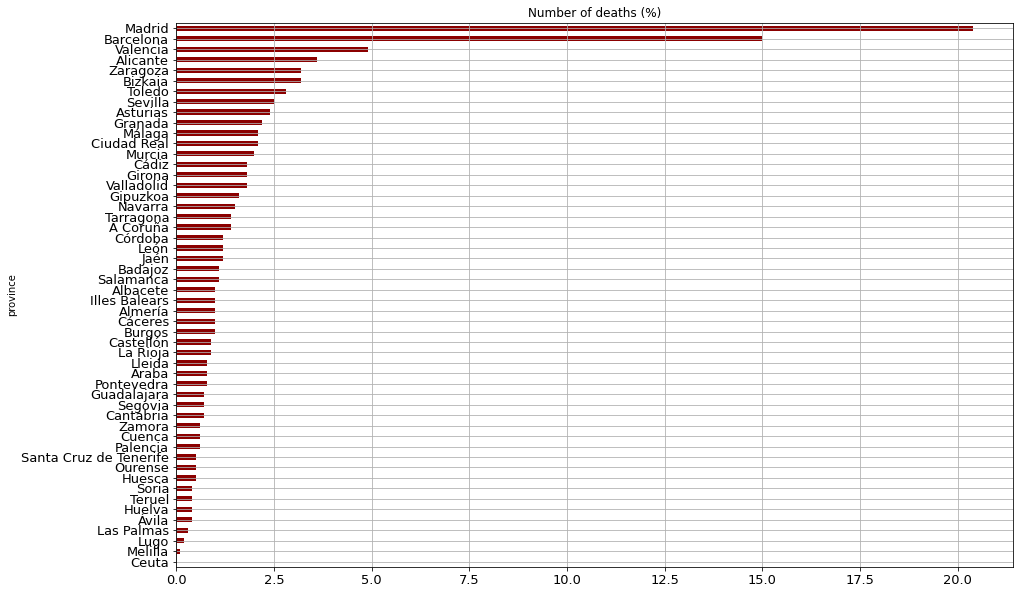

In [28]:
graph_bar('vertical', sort_data(province, 'Number of deaths (%)'), 
          'Number of deaths (%)', 'Number of deaths (%)', 'Darkred')

# Pandemic Evolution

In [29]:
bydate = evolution(db1)

Observing the plots below, one can assess that the 7 days moving average of the number of infections would smooth our data, and thus, reduce variability. This might be due to the fact that the autunomous regions of Spain communicated the statisitics on a weekly basis. Therefore, one will inspect for the Number of Infections and expand this transformation to the remaining statistics

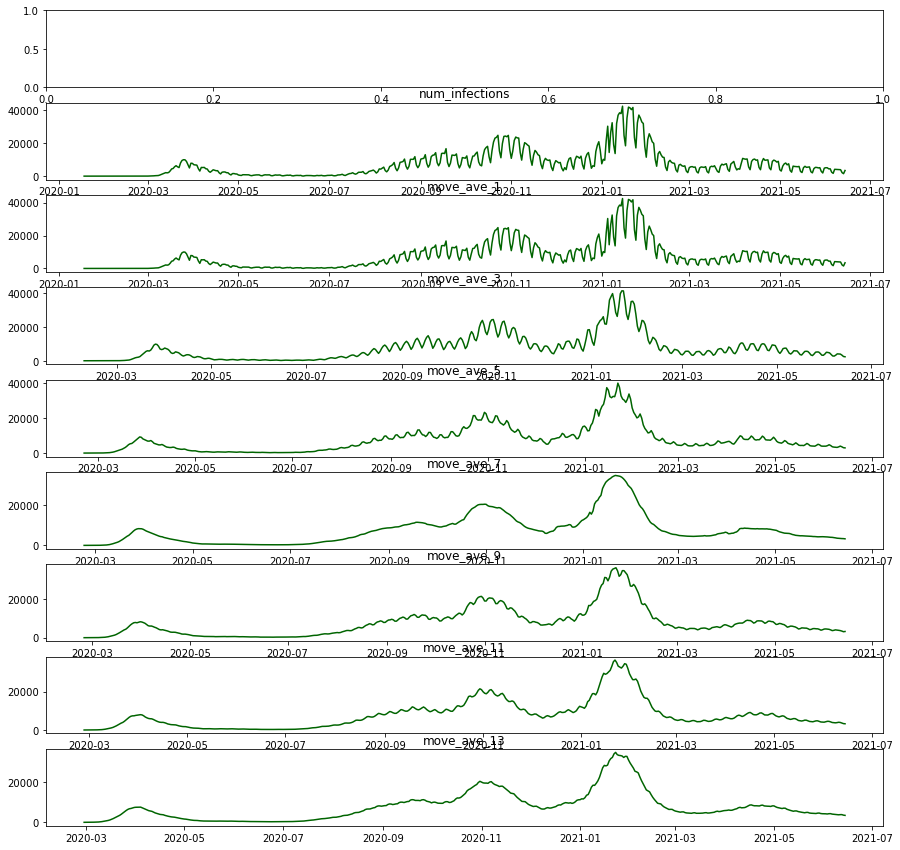

In [30]:
inspect_mov_ave(bydate)

## Data smoothing

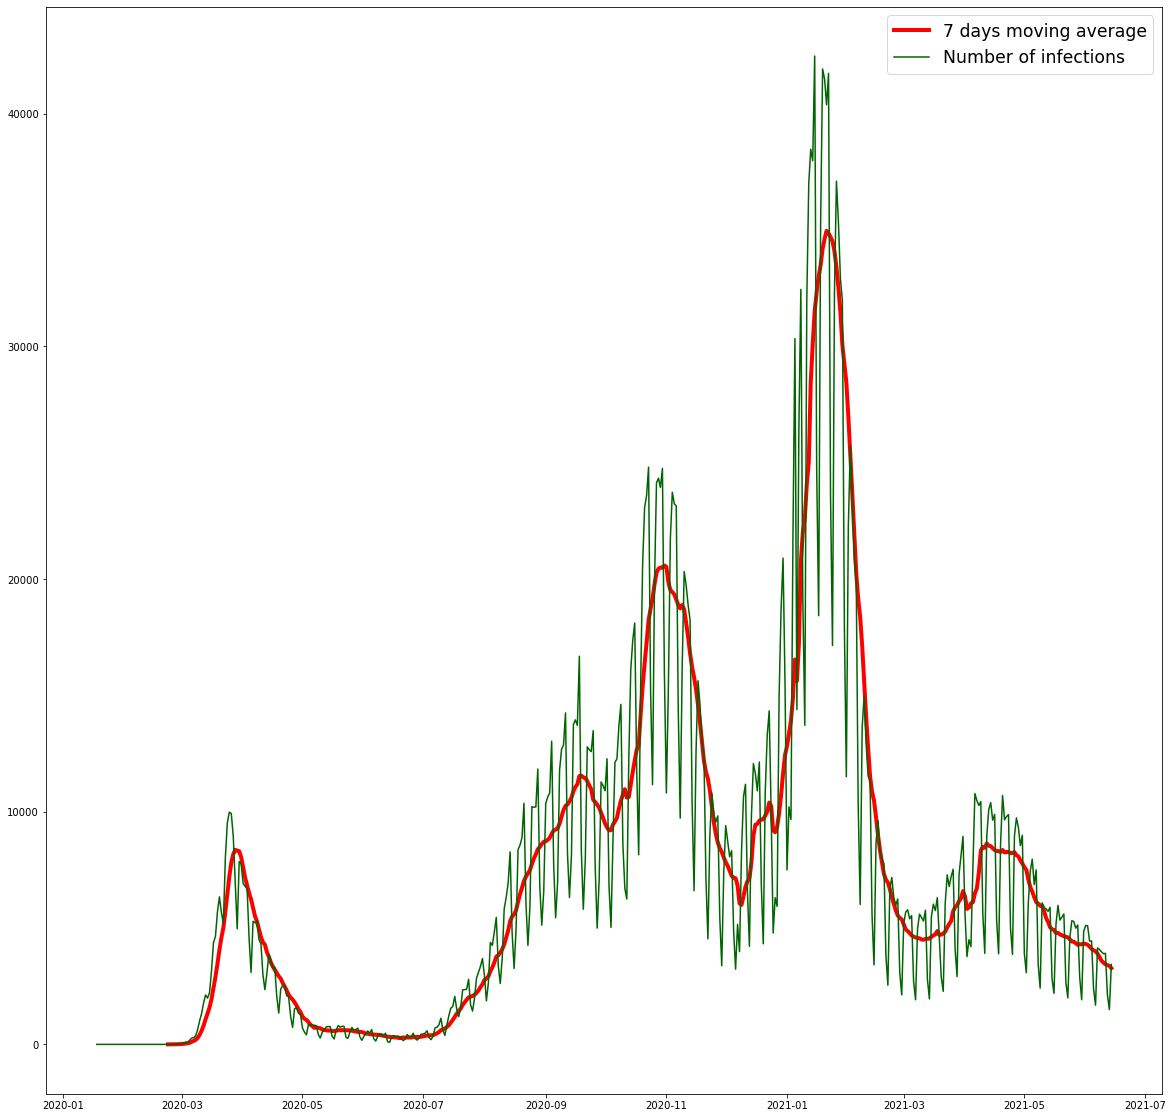

In [31]:
compare_7mov_ave()

## Number of infections

## Spain

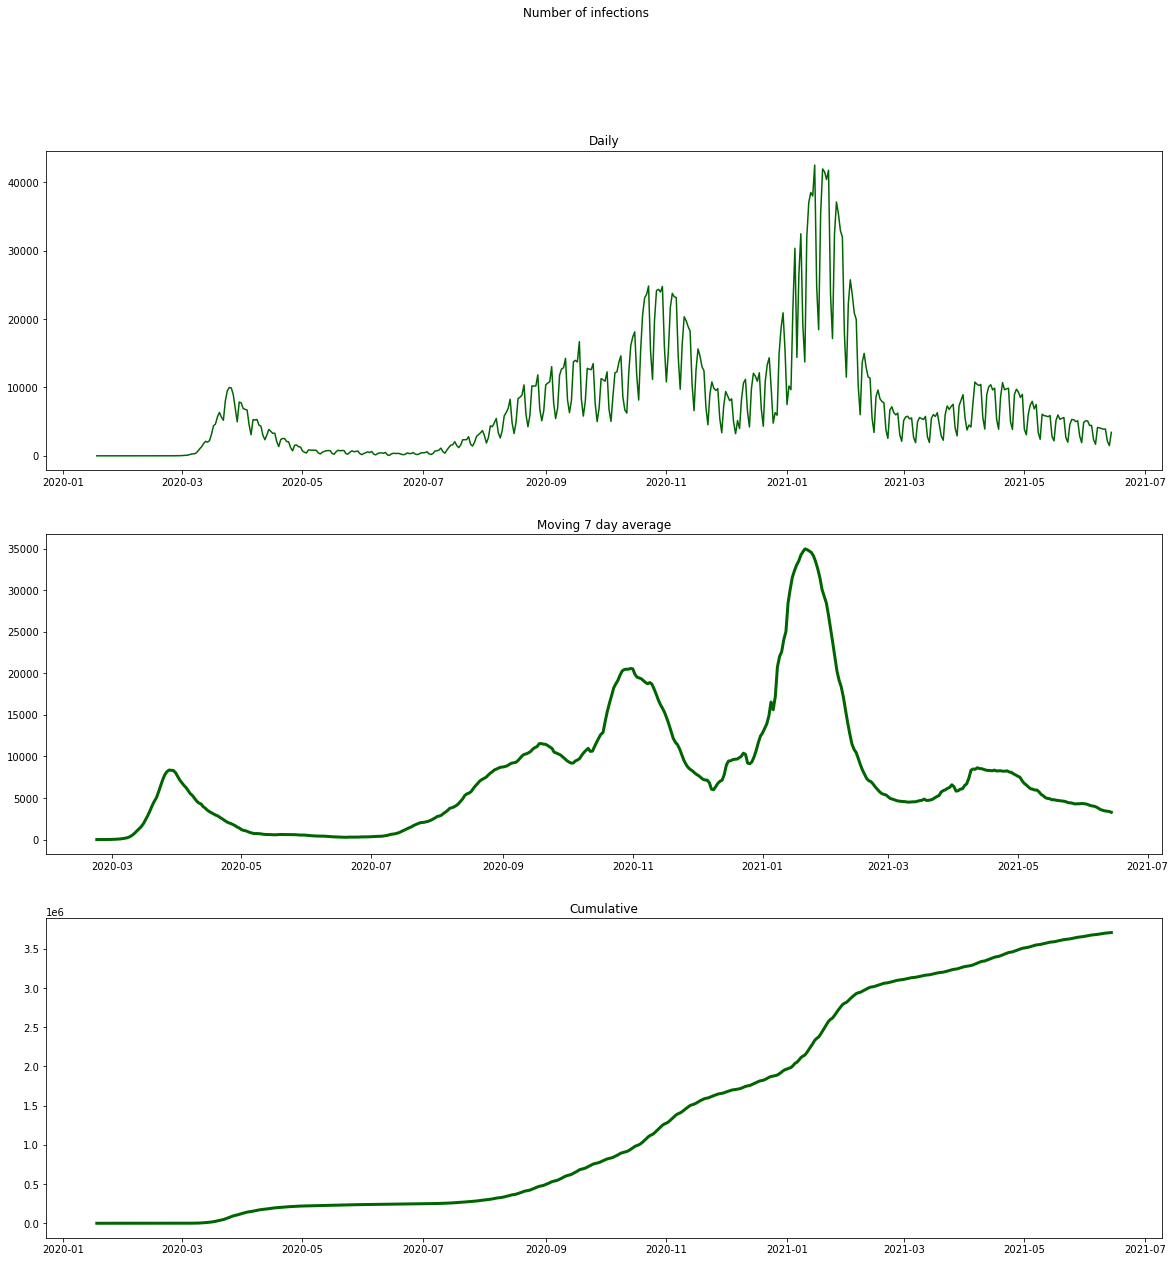

In [32]:
overview(bydate, 'Number of infections')

## Number of hospitalisations

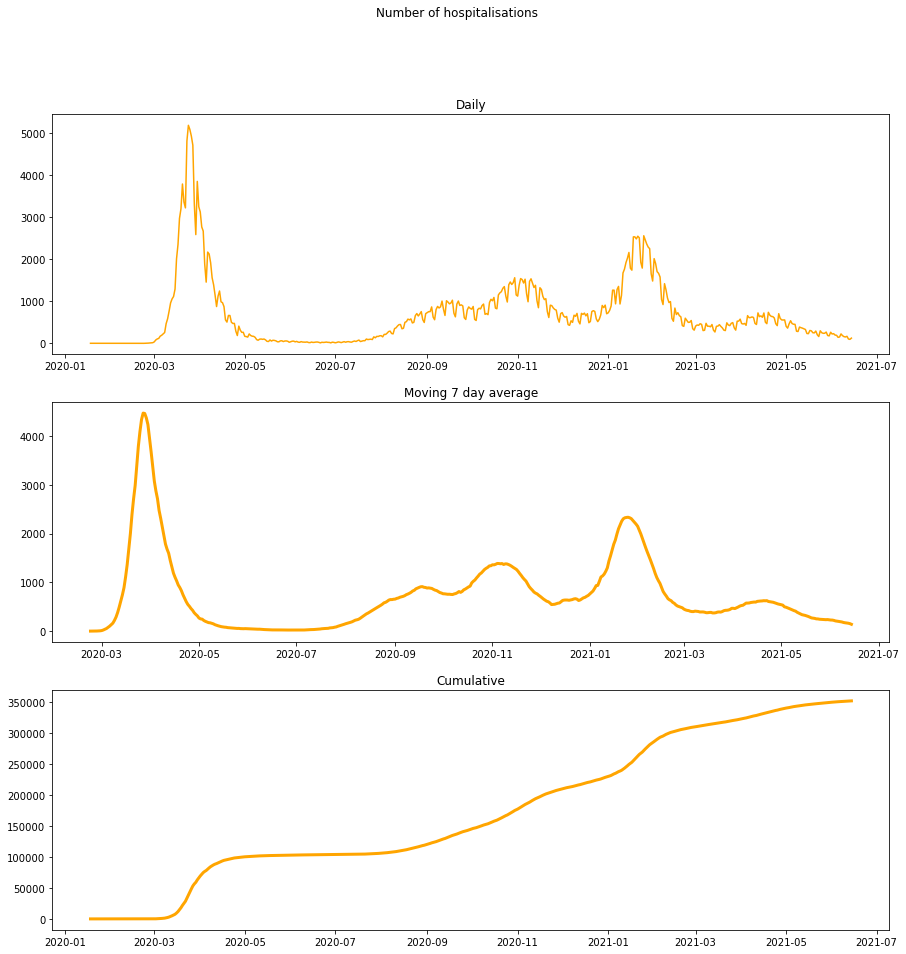

In [33]:
overview(bydate, 'Number of hospitalisations')

## Number of Intensive Care Units

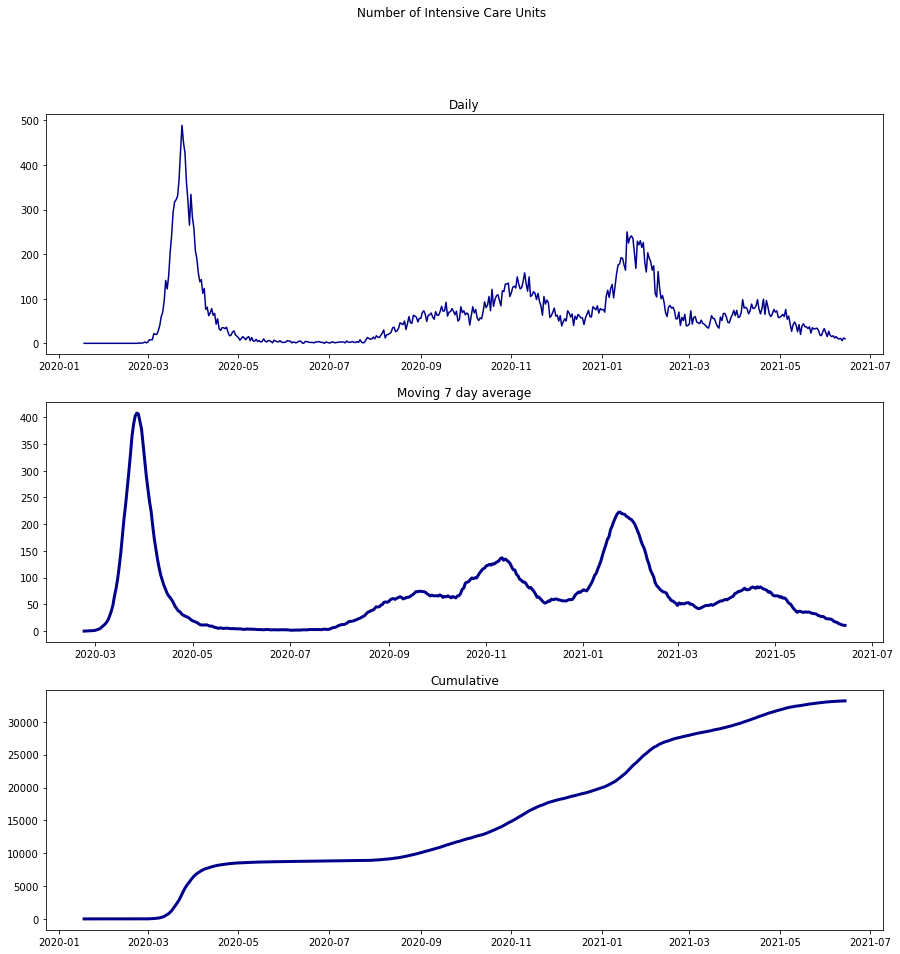

In [34]:
overview(bydate, 'Number of Intensive Care Units')

## Number of deaths

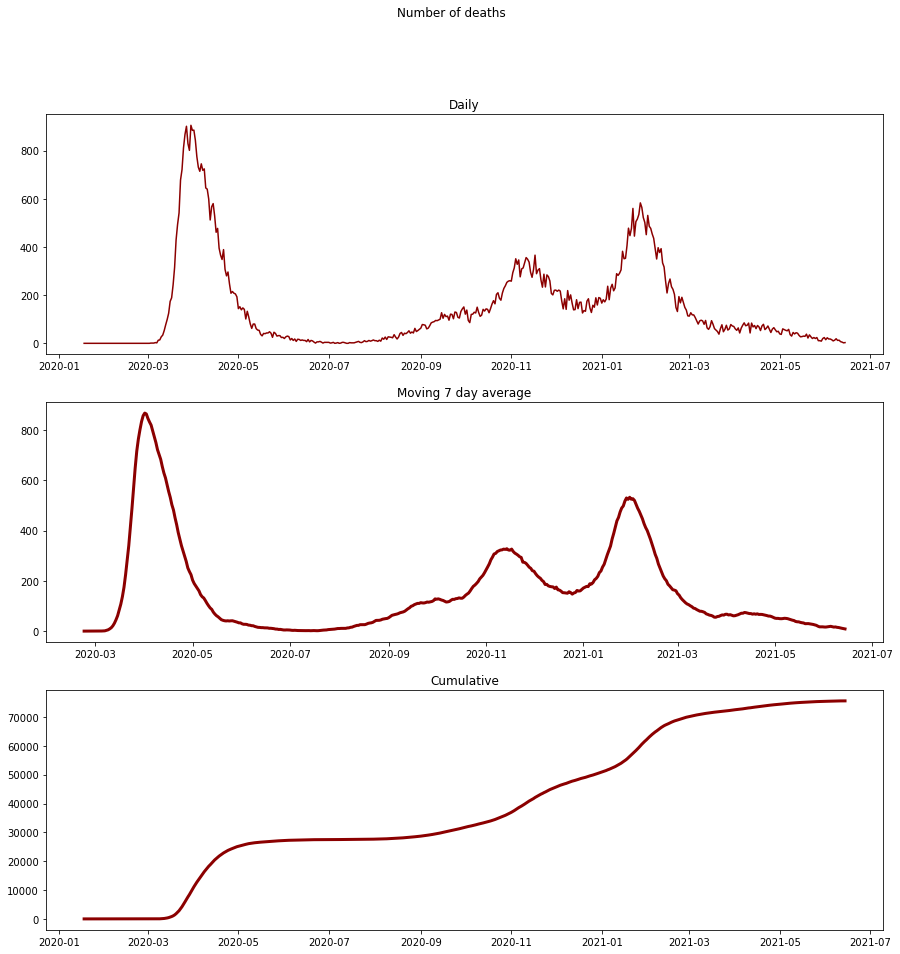

In [35]:
overview(bydate, 'Number of deaths')

# Last seven days

In [36]:
last7 = bydate.tail(7)

## Number of infections

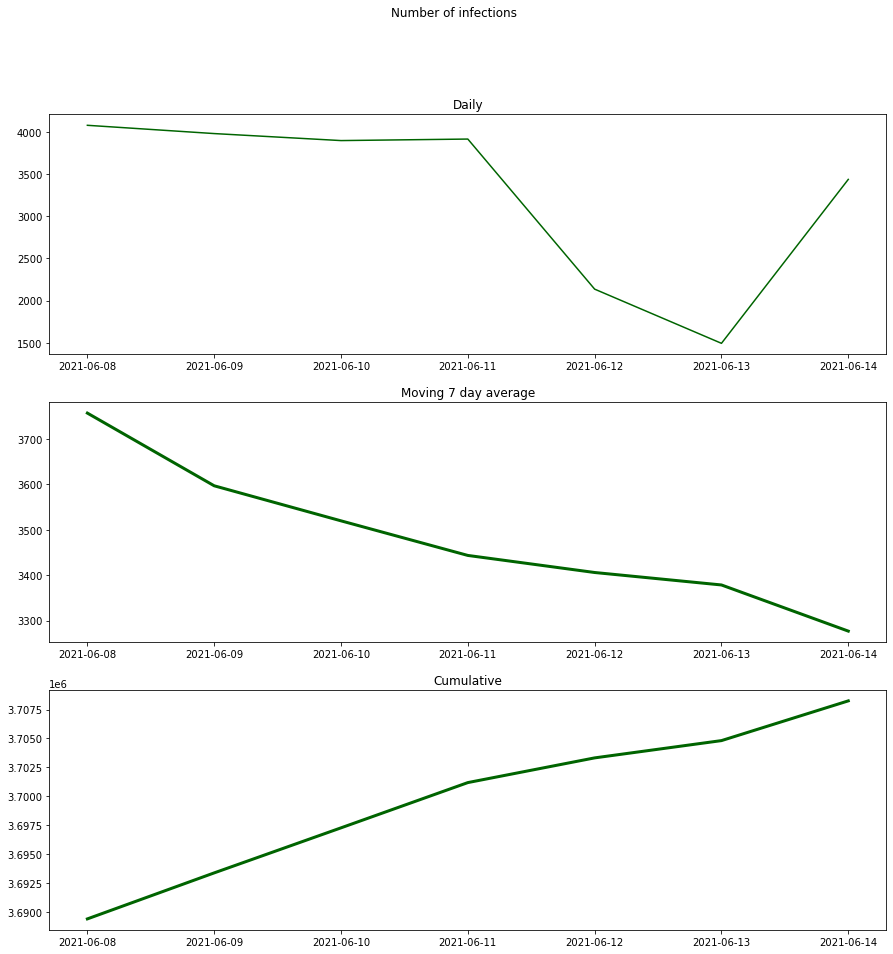

In [37]:
overview(last7, 'Number of infections')

## Number of hospitalisation

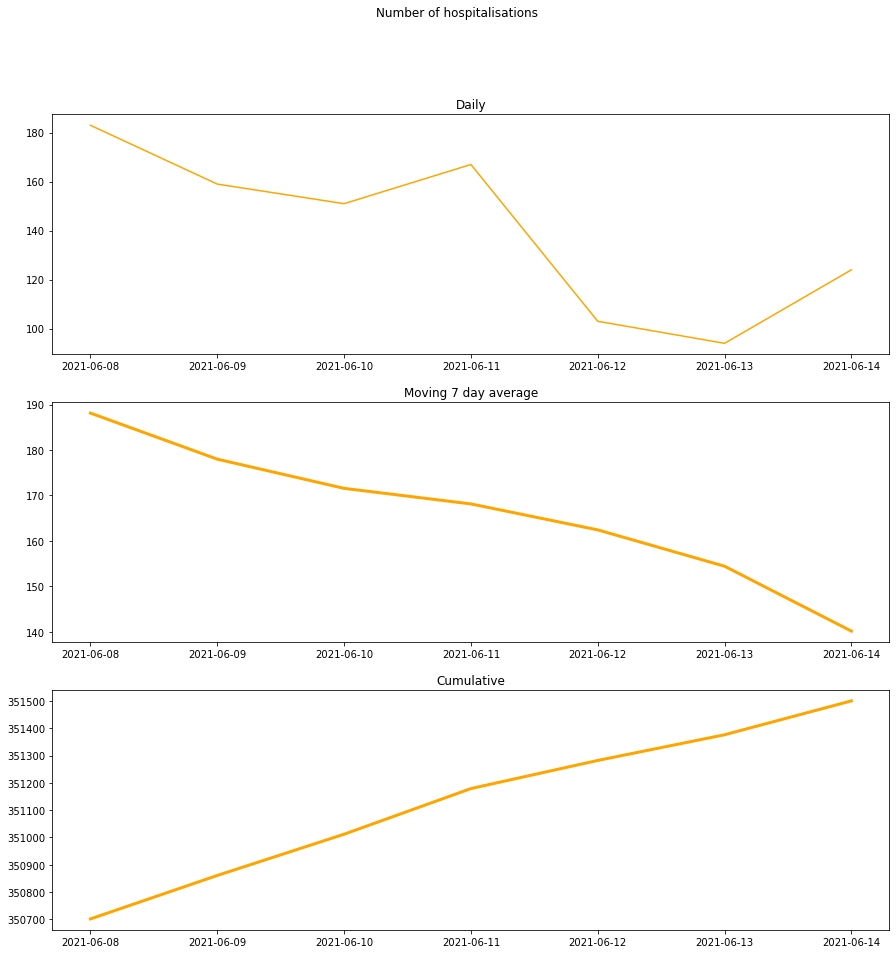

In [38]:
overview(last7, 'Number of hospitalisations')

## Number of Intensive Care Units

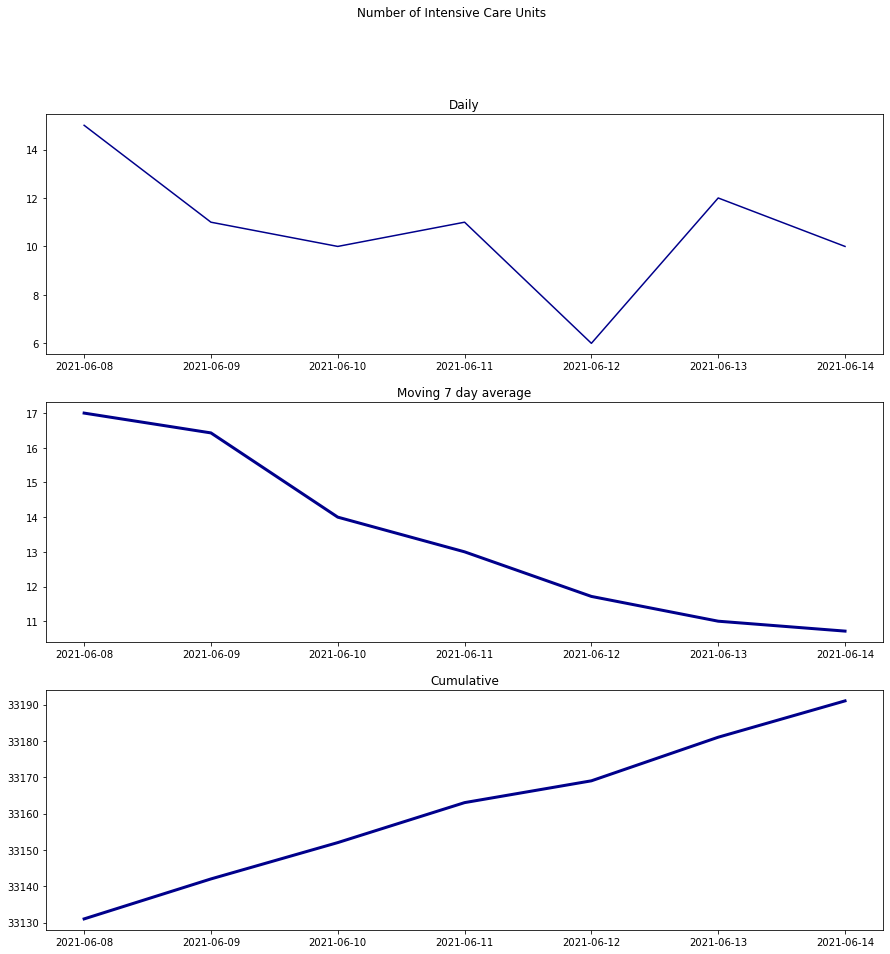

In [39]:
overview(last7, 'Number of Intensive Care Units')

## Number of deaths

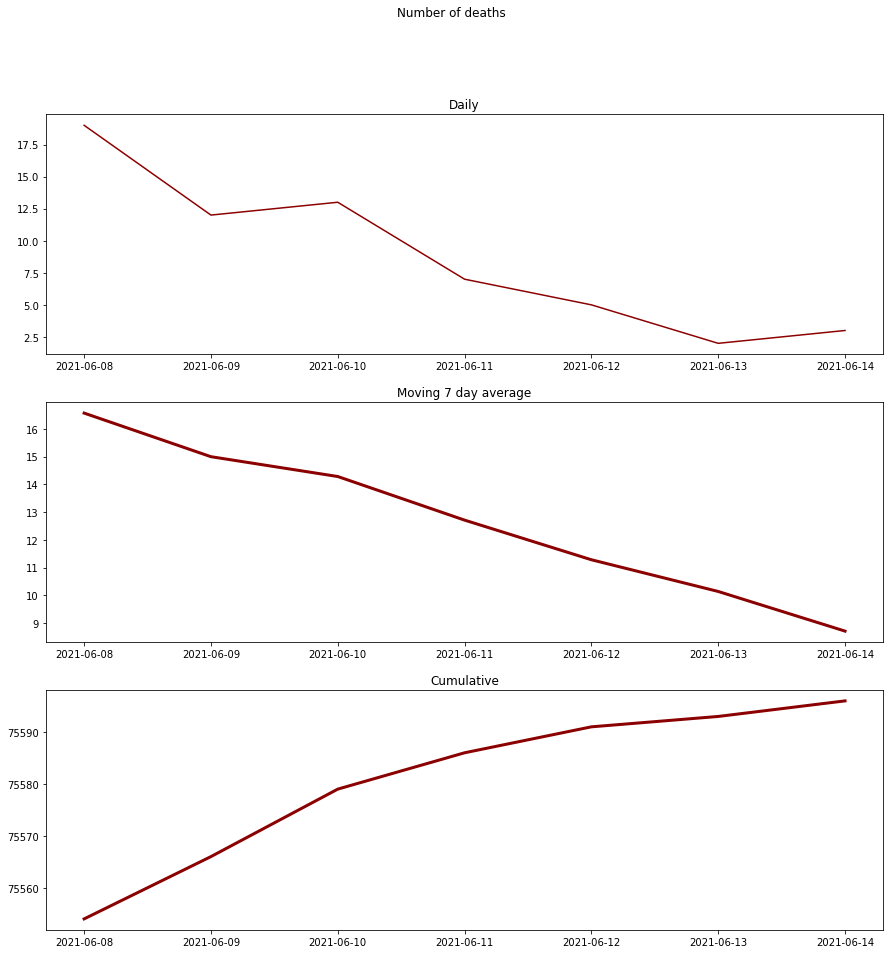

In [40]:
overview(last7, 'Number of deaths')

# Age

In [41]:
ages = organise('age_interval')

## Number of infections

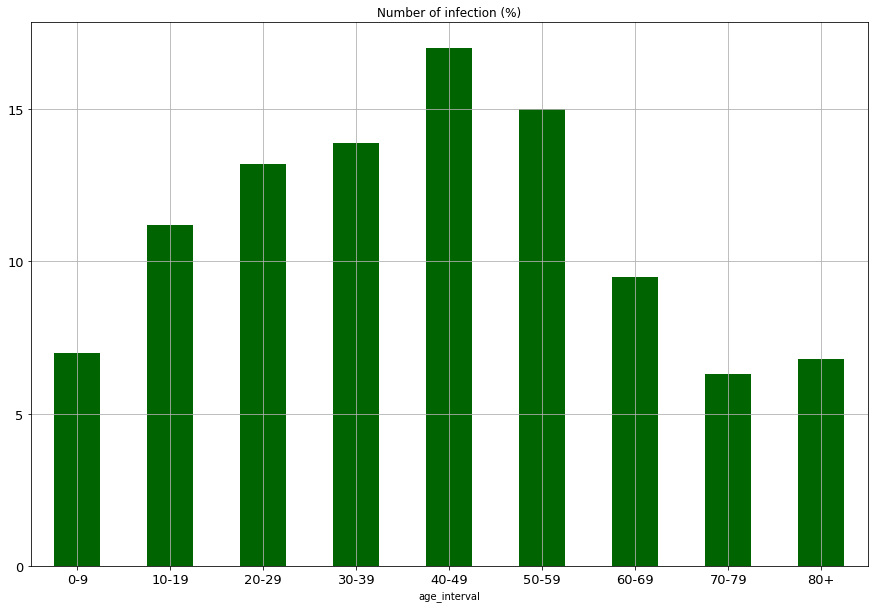

In [42]:
graph_bar('horizontal', ages, 'Number of infection (%)',
          'Number of infection (%)', 'Darkgreen')

## Number of hospitalisation

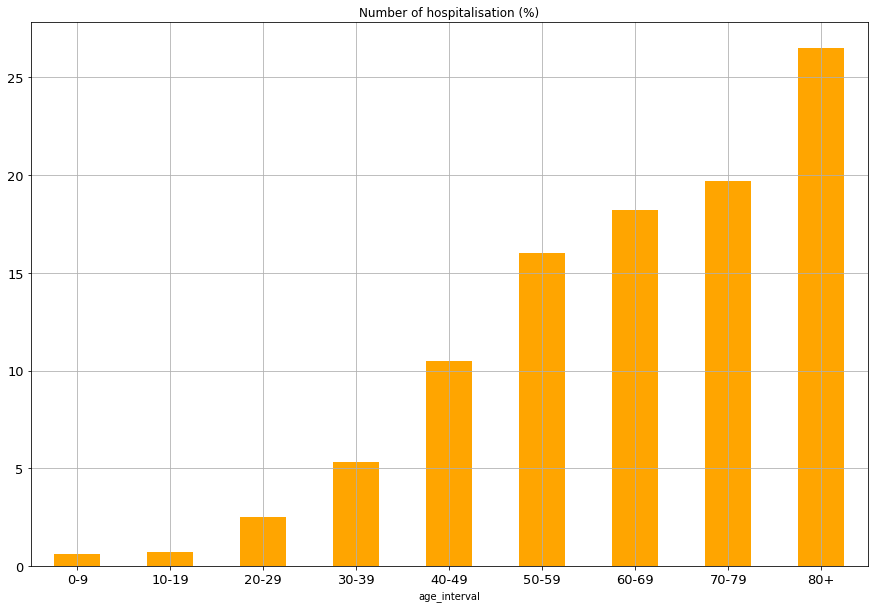

In [43]:
graph_bar('horizontal', ages, 'Number of hospitalisation (%)',
          'Number of hospitalisation (%)', 'Orange')

## Number of Intensive Care Units

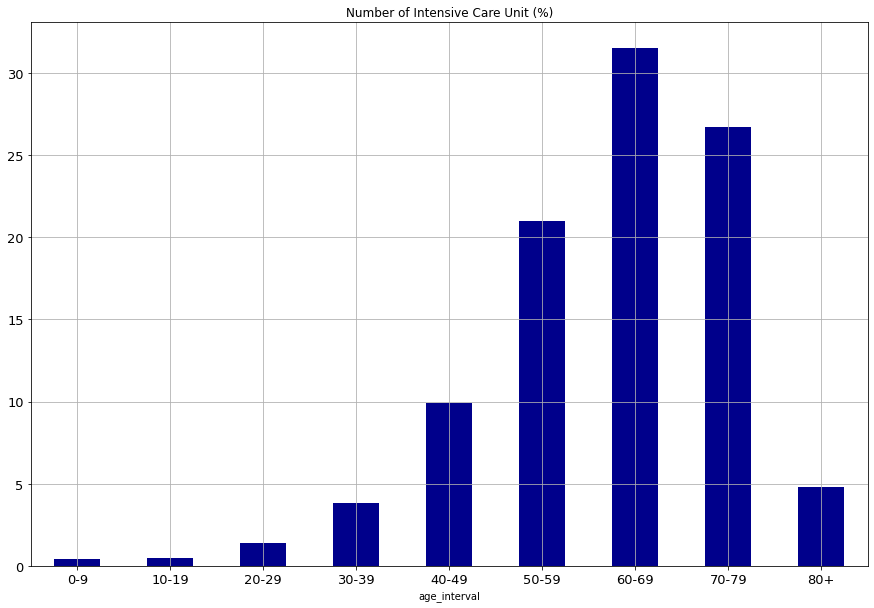

In [44]:
graph_bar('horizontal', ages, 'Number of Intensive Care Unit (%)',
          'Number of Intensive Care Unit (%)', 'Darkblue')

## Number of deaths

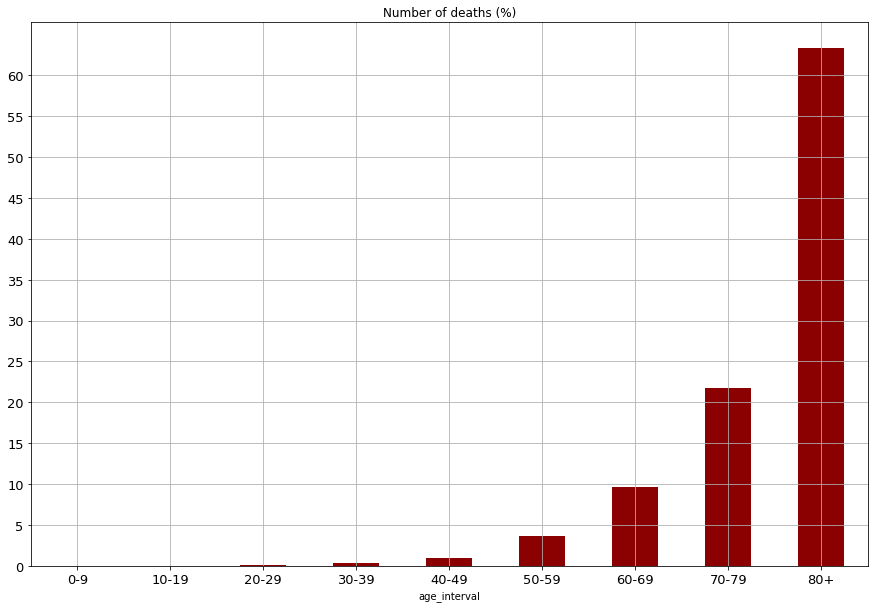

In [45]:
graph_bar('horizontal', ages, 'Number of deaths (%)',
          'Number of deaths (%)', 'Darkred')

## Severe Cases

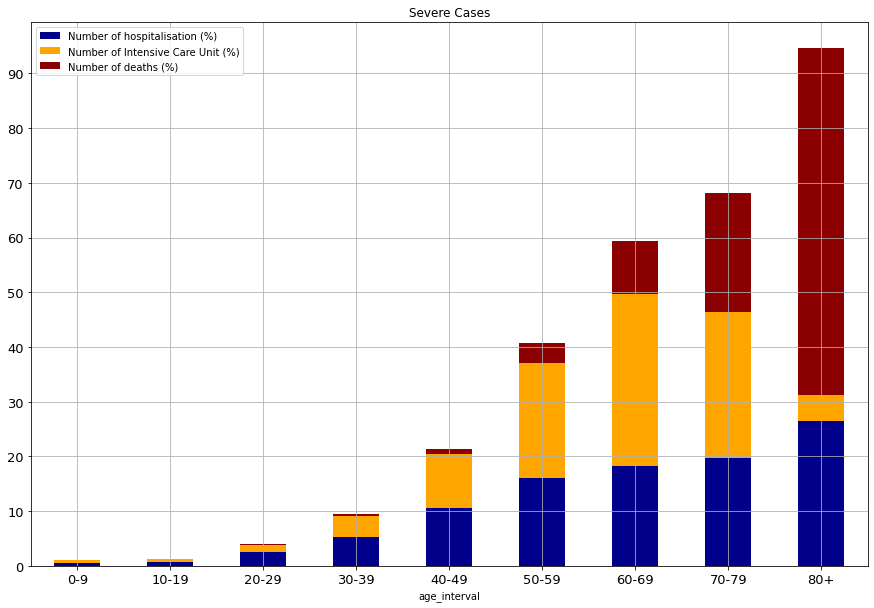

In [46]:
severe_cases(ages)

# Gender

In [47]:
gender = ages = organise('sex')

## Number of infections¶

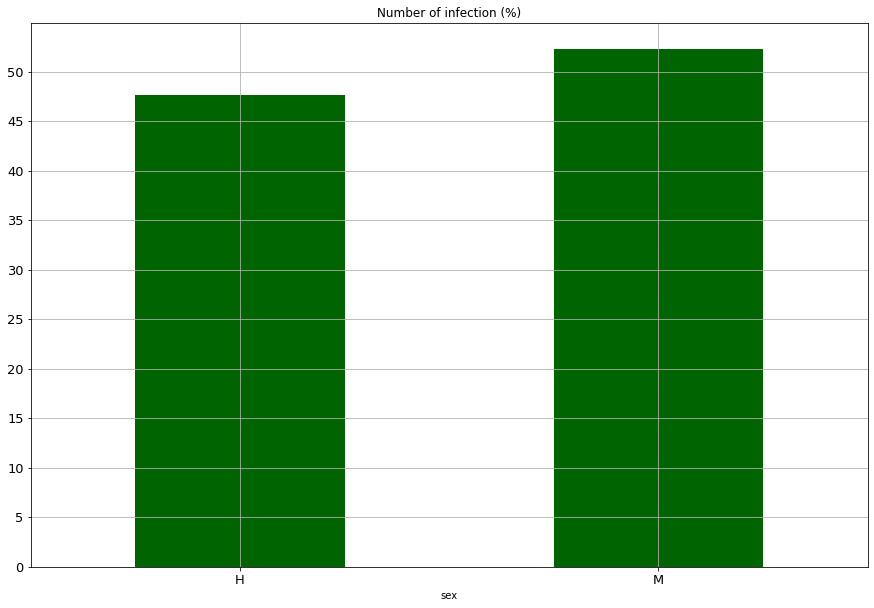

In [48]:
graph_bar('horizontal', gender, 'Number of infection (%)',
          'Number of infection (%)', 'Darkgreen')

## Number of hospitalisation

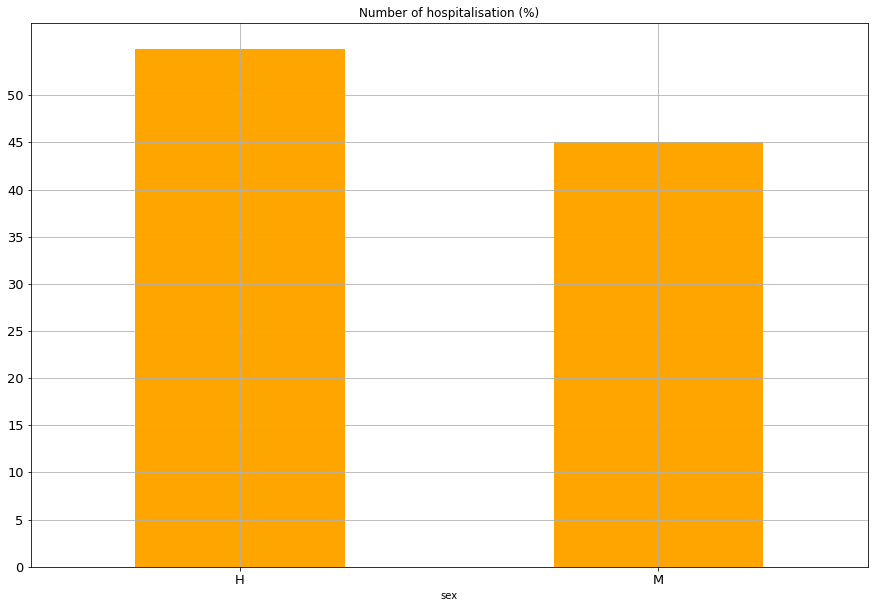

In [49]:
graph_bar('horizontal', gender, 'Number of hospitalisation (%)',
          'Number of hospitalisation (%)', 'Orange')

## Number of Intensive Care Units

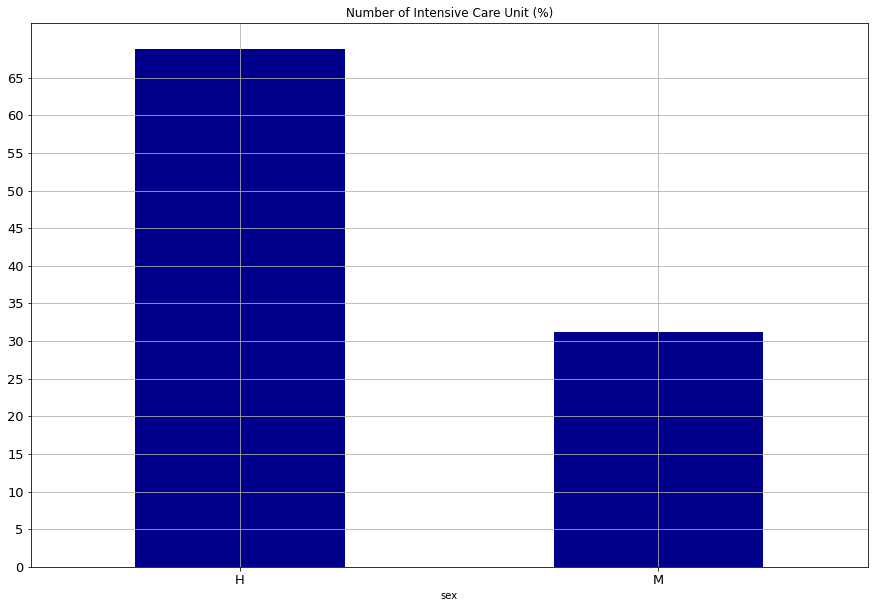

In [50]:
graph_bar('horizontal', gender, 'Number of Intensive Care Unit (%)',
          'Number of Intensive Care Unit (%)', 'Darkblue')

## Number of deaths

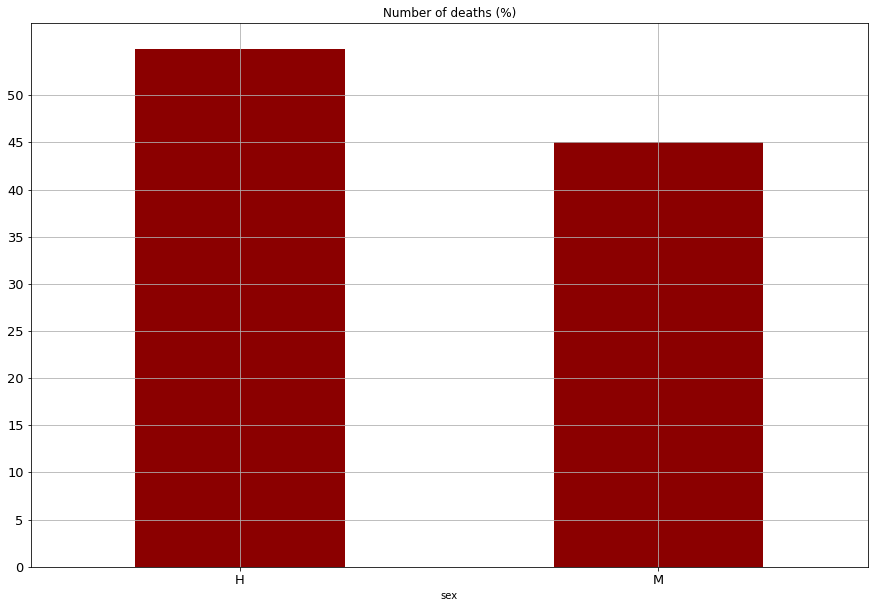

In [51]:
graph_bar('horizontal', gender, 'Number of deaths (%)',
          'Number of deaths (%)', 'Darkred')

# Exports

## Region, Province and age

In [53]:
region_province_age = organise(['autonomous_region', 'province', 'age_interval'])

In [71]:
region_province_age.to_csv('region_province_age.csv', index=True)

## Evolution

In [58]:
evolution = organise(['date','autonomous_region', 'province', 'age_interval'])

In [59]:
evolution = mov_7_ave(evolution)

In [60]:
evolution

num_infections  \
date       autonomous_region   province               age_interval                   
2020-01-18 Comunidad de Madrid Madrid                 40-49                      1   
2020-01-31 Canarias            Santa Cruz de Tenerife 20-29                      1   
2020-02-09 Illes Balears       Illes Balears          40-49                      1   
2020-02-12 Catalunya           Barcelona              30-39                      1   
                               Lleida                 50-59                      1   
...                                                                            ...   
2021-06-14 Región de de Murcia Murcia                 40-49                     14   
                                                      50-59                      6   
                                                      60-69                      4   
                                                      70-79                      1   
                                                      80+                        1   

                                                                    num_hosp  \
date       autonomous_region   province               age_interval             
2020-01-18 Comunidad de Madrid Madrid                 40-49                1   
2020-01-31 Canarias            Santa Cruz de Tenerife 20-29                0   
2020-02-09 Illes Balears       Illes Balears          40-49                1   
2020-02-12 Catalunya           Barcelona              30-39                0   
                               Lleida                 50-59                0   
...                                                                      ...   
2021-06-14 Región de de Murcia Murcia                 40-49                0   
                                                      50-59                1   
                                                      60-69                1   
                                                      70-79                0   
                                                      80+                  0   

                                                                    num_uci  \
date       autonomous_region   province               age_interval            
2020-01-18 Comunidad de Madrid Madrid                 40-49               0   
2020-01-31 Canarias            Santa Cruz de Tenerife 20-29               0   
2020-02-09 Illes Balears       Illes Balears          40-49               0   
2020-02-12 Catalunya           Barcelona              30-39               0   
                               Lleida                 50-59               0   
...                                                                     ...   
2021-06-14 Región de de Murcia Murcia                 40-49               1   
                                                      50-59               0   
                                                      60-69               0   
                                                      70-79               0   
                                                      80+                 0   

                                                                    num_dead  \
date       autonomous_region   province               age_interval             
2020-01-18 Comunidad de Madrid Madrid                 40-49                0   
2020-01-31 Canarias            Santa Cruz de Tenerife 20-29                0   
2020-02-09 Illes Balears       Illes Balears          40-49                0   
2020-02-12 Catalunya           Barcelona              30-39                0   
                               Lleida                 50-59                0   
...                                                                      ...   
2021-06-14 Región de de Murcia Murcia                 40-49                0   
                                                      50-59                0   
                                                      60-69                0   


In [74]:
evolution.to_csv('evolution.csv', index=True)

## Bydate

In [72]:
bydate.to_csv('bydate.csv', index=True)

# Last day with predictions

In [61]:
predictions = pd.read_csv('predictions.csv')

In [63]:
predictions = predictions.rename(columns= {'Unnamed: 0': 'date'})

In [64]:
predictions

,date,pred_num_infections,pred_num_hosp,pred_num_uci,pred_num_dead
0,2021-06-11,3430.818823,159.873646,11.825539,13.016844
1,2021-06-12,3353.771666,157.179157,9.694381,12.667172
2,2021-06-13,3191.312601,158.815545,8.542284,13.765634
3,2021-06-14,3046.618273,162.838239,8.306022,14.791417
4,2021-06-15,2952.195890,167.128339,8.000496,16.457542
5,2021-06-16,2946.160710,179.841826,8.353581,18.820792
6,2021-06-17,3008.848439,190.712059,9.258439,21.751402


In [65]:
last7 = pd.concat([last7, predictions])

In [67]:
last7['date'] = pd.to_datetime(last7.date)

In [68]:
last7

,date,num_infections,num_hosp,num_uci,num_dead,cumu_num_infections,cumu_num_hosp,cumu_num_uci,cumu_num_dead,ave_7_num_infections,ave_7_num_hosp,ave_7_num_uci,ave_7_num_dead,pred_num_infections,pred_num_hosp,pred_num_uci,pred_num_dead
477,2021-06-08,4078.0,183.0,15.0,19.0,3689388.0,350702.0,33131.0,75554.0,3756.857143,188.142857,17.000000,16.571429,NaN,NaN,NaN,NaN
478,2021-06-09,3980.0,159.0,11.0,12.0,3693368.0,350861.0,33142.0,75566.0,3596.857143,178.000000,16.428571,15.000000,NaN,NaN,NaN,NaN
479,2021-06-10,3897.0,151.0,10.0,13.0,3697265.0,351012.0,33152.0,75579.0,3519.714286,171.571429,14.000000,14.285714,NaN,NaN,NaN,NaN
480,2021-06-11,3915.0,167.0,11.0,7.0,3701180.0,351179.0,33163.0,75586.0,3443.571429,168.142857,13.000000,12.714286,NaN,NaN,NaN,NaN
481,2021-06-12,2137.0,103.0,6.0,5.0,3703317.0,351282.0,33169.0,75591.0,3406.000000,162.428571,11.714286,11.285714,NaN,NaN,NaN,NaN
482,2021-06-13,1495.0,94.0,12.0,2.0,3704812.0,351376.0,33181.0,75593.0,3378.571429,154.428571,11.000000,10.142857,NaN,NaN,NaN,NaN
483,2021-06-14,3437.0,124.0,10.0,3.0,3708249.0,351500.0,33191.0,75596.0,3277.000000,140.142857,10.714286,8.714286,NaN,NaN,NaN,NaN
0,2021-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3430.818823,159.873646,11.825539,13.016844
1,2021-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3353.771666,157.179157,9.694381,12.667172
2,2021-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3191.312601,158.815545,8.542284,13.765634


In [73]:
last7.to_csv('last7.csv', index=True)